# Dataset Explanation and Overview
The Forest Fires data is from a study conducted by Paulo Cortez and Aníbal Morais titled "A Data Mining Approach to Predict Forest Fires using Meteorological Data" from the University of Minho, Portugal. The data was collected from the Montesinho natural park in the northeast region of Portugal and it spans from January 2000 to December 2003. The purpose of it is to predict the burned area of forest fires using meteorological data and to improve firefighting resource management by prioritizing responses based on predictions.

Key features from the data set:
- Spatial and temporal features (X, Y, month, day)
- Meteorological data (temp, RH, wind, rain)
- Fire Weather Index components (FFMC, DMC, DC, ISI)
- Target variable (area, in hectares)

Relative Humidity (RH) represents the percentage of moisture in the air relative to the maximum it could hold at that temperature. Lower RH means drier conditions, which can increase fire risk.

Fine Fuel Moisture Code (FFMC) reflects the moisture content of surface litter and fine fuels. It influences how easily a fire can start and spread. The scale is from 0 to 101, where the higher it is, the more flammable.

Duff Moisture Code (DMC) represents the moisture in the upper soil layer or decomposed organic material (duff). It affects the fire intensity and resistance to control.

Drought Code (DC) measures the moisture in deep, compact organic layers. It represents long-term drying and deep burning potential.

Initial Spread Index (ISI) combines wind speed and FFMC to predict rate of fire spread immediately after ignition. Higher ISI means a fire will spread more quickly.

In [28]:
import pandas as pd

# load dataset
fires = pd.read_csv('forest-fires.csv')

# print the first 10 rows
display(fires.head(10))

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# 1. Count Plot of Fires by Month

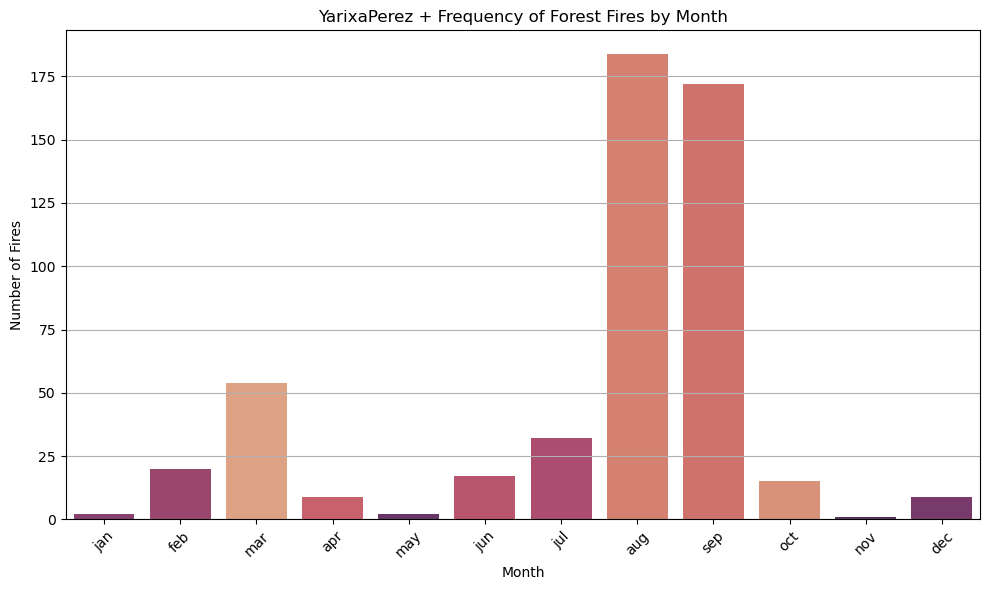

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10, 6))
sns.countplot(data=fires, x='month', hue='month', 
              order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                     'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
              palette='flare', legend=False)
plt.title('YarixaPerez + Frequency of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

fig1.savefig('YarixaPerez_FiresByMonth.png')

## Purpose
To reveal teh seasonal patterns in forest fire frequency an identify high-risk months.

## Insights
The fire counts are expected to be the highest in July and August, which aligns with dry and hot summer conditions in Portugal.

## Expressiveness & Effectiveness
The categorical nature of months makes bar plots ideal because they are highly expressive for frequency. The visualization is effective in highlighting the seasonal peaks for immproved fire management.

# 2. Box Plot of Burned Area by Day of the Week

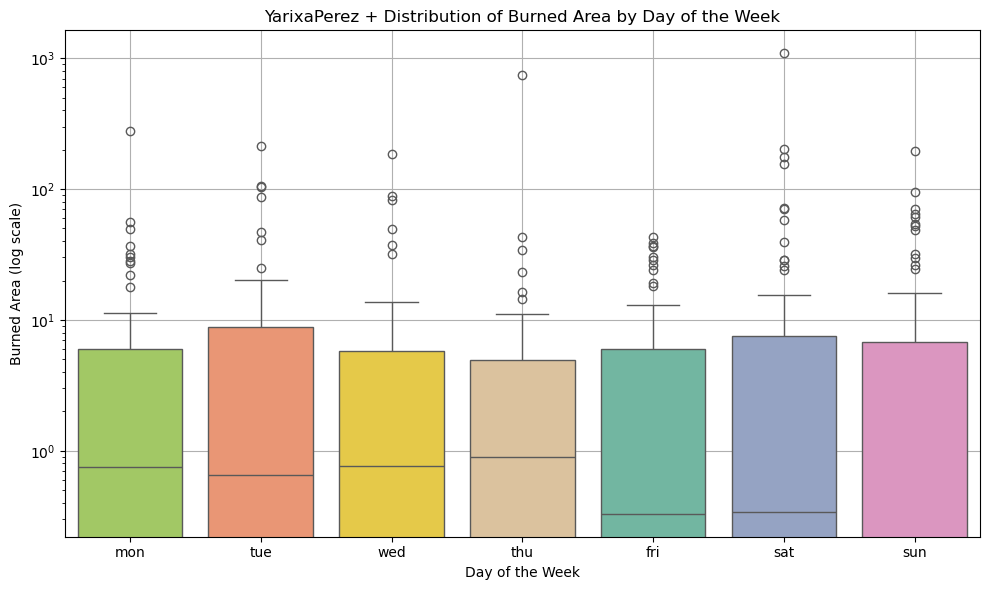

In [30]:
fig2 = plt.figure(figsize=(10, 6))
sns.boxplot(data=fires, x='day', y='area', hue='day', 
            order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
            palette='Set2', legend=False)
plt.yscale('log')
plt.title('YarixaPerez + Distribution of Burned Area by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Burned Area (log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

fig2.savefig('YarixaPerez_BurnedAreaDistribution.png')

## Purpose
To explore if weekends are linked with larger fires which may the effect of increased human activity.

## Insights
Outliers on weekends show higher fire severity, which suggests human behavioral patterns.

## Expressiveness & Effectiveness
The box plots balances details and enables fast pattern recognition. They effectively show the variation and outlier events by day.

# 3. Violin Plot of FFMC across Fire Size Categories

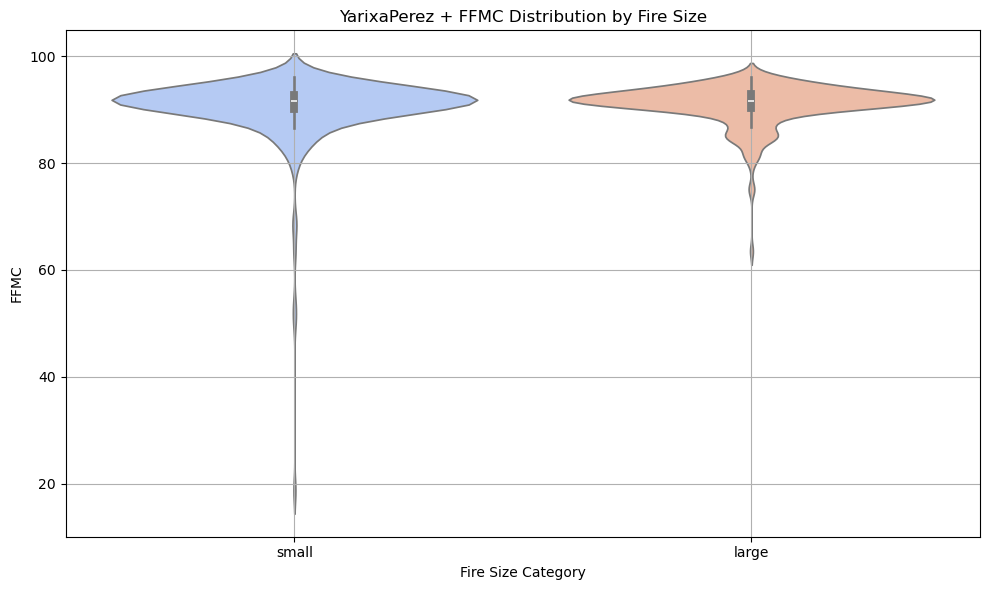

In [31]:
import numpy as np

# Add a size category for visualization
fires['fire_size'] = np.where(fires['area'] <= 1, 'small', 'large')

fig3 = plt.figure(figsize=(10, 6))
sns.violinplot(data=fires, x='fire_size', y='FFMC', hue='fire_size', 
               palette='coolwarm', legend=False)
plt.title('YarixaPerez + FFMC Distribution by Fire Size')
plt.xlabel('Fire Size Category')
plt.ylabel('FFMC')
plt.grid(True)
plt.tight_layout()
plt.show()

fig3.savefig('YarixaPerez_FFMCDistribution.png')

## Purpose
To visualize how dryness of fine fuels (FFMC) relates to fire size.

## Insights
A higher FFMC is expected for larger fires, whic indicates a connection between ignition ease and fire spread.

## Expressiveness & Effectiveness
This visualization is highly expressive, which reveals a distribution. It is effective in showing the shape which helps understand any underlying variability.

# 4. Heatmap of Feature Correlations

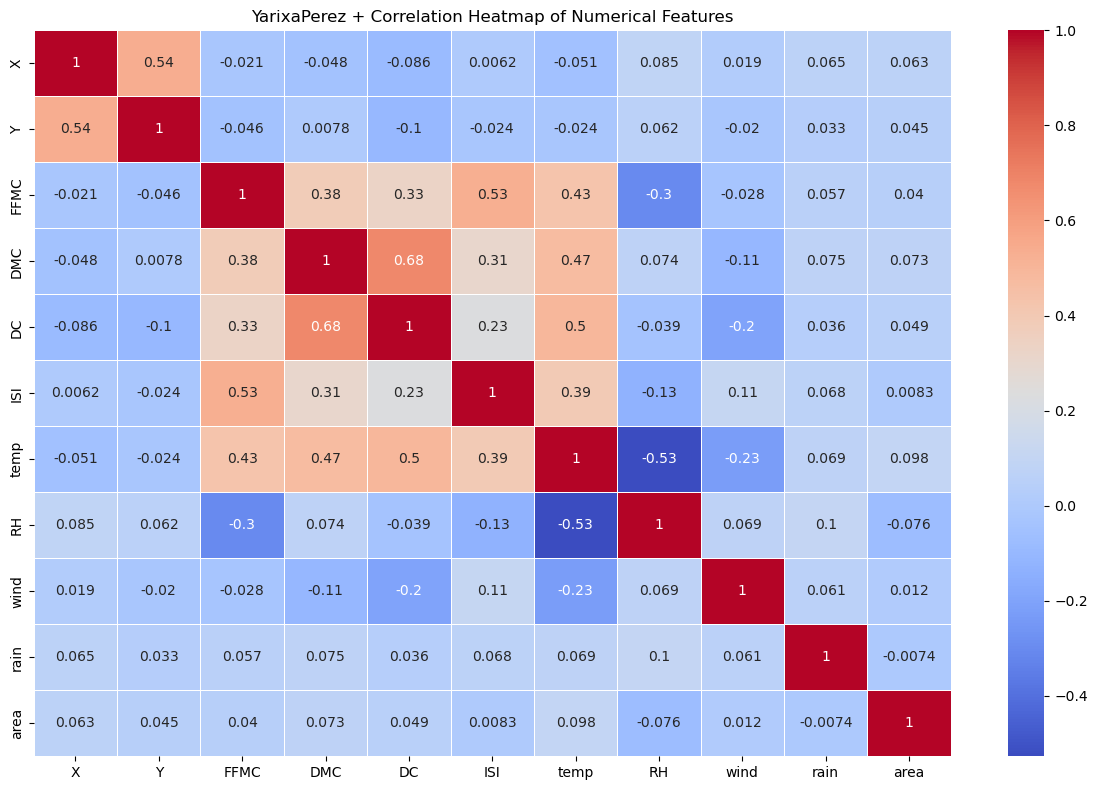

In [25]:
fig4 = plt.figure(figsize=(12, 8))
sns.heatmap(fires.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('YarixaPerez + Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

fig4.savefig("YarixaPerez_NumericalHeatmap.png")

## Purpose
To find any linear relationships among meteorological features and identify predictors of burned area.

## Insights
There is a negative correlation between temperature and humidity. There are moderate correlations between ISI, FFMC, and fire area.

## Expressiveness & Effectiveness
The heatmap is expressive in showing correlation matrices. It is effective in spotting key feature-target relationships.

# 5. Pair Plot of Meteorological Features

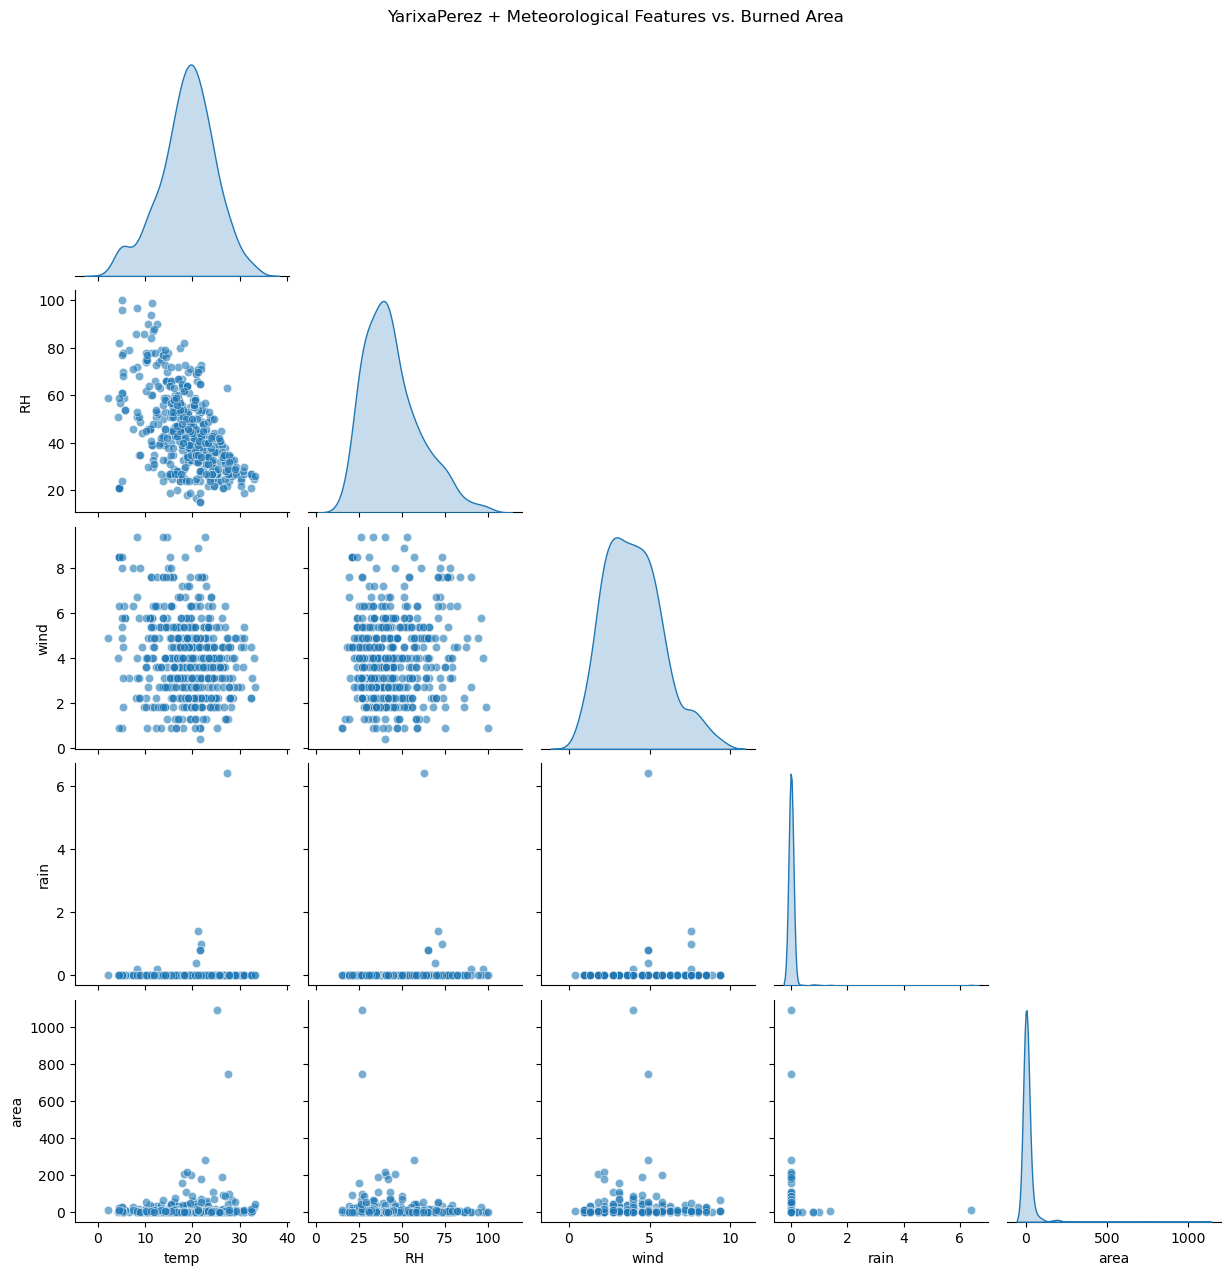

In [26]:
fig5 = sns.pairplot(fires[['temp', 'RH', 'wind', 'rain', 'area']], corner=True, plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('YarixaPerez + Meteorological Features vs. Burned Area', y=1.02)
plt.show()

fig5.savefig('YarixaPerez_MeteorologicalRelationships.png')

## Purpose
To explore multiple variable relationships and detect nonlinear patterns or feature interactions that affect fire area.

## Insights
The visual shows that a higher temperature and low RH are associated with a larger burn area. It also shows tha rain is inversely related to the size of the fire.

## Expressiveness & Effectiveness
The visual is expressive when combining histograms with scatterplots, thereby making them effective for feature selection or when formulating a hypothesis. In this case it serves good for exploratory data analysis for the dataset.